<a href="https://colab.research.google.com/github/tonya-st/energy_project/blob/master/Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
import math

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [67]:
col_names = ['Energy', 'People','Life','Economy','Manufactur']
data = pd.read_excel('correl.xlsx', keep_default_na=False)
df = pd.DataFrame(data)
df

,Energy,People,Life,Economy,Manufactur,Capacity
0,1385.8,439.8,147348,47194.5,7140,115.2
1,1405.2,441.2,171264,56803.3,6969,107.2
2,1253.7,443.5,204852,65300.4,7141,108.7
3,1300.5,445.4,224832,70862.3,7349,102.7
4,1343.6,447.8,264936,75622.5,7535,118.5
...,...,...,...,...,...,...
120,15579.9,2514.4,273756,852028.6,43364,100.9
121,1254.0,407.6,213288,48663.3,9430,372.9
122,1319.2,422.5,314868,65863.7,10549,119.4
123,1358.1,432.7,337560,72789.6,11214,103.2


In [68]:
y=df["Energy"]
x1=df["People"]
x2=df["Life"]
x3=df["Economy"]
x4=df["Manufactur"]

In [69]:
x1_, y_ = np.array(x1), np.array(y)
x1__, y__ = pd.Series(x1_), pd.Series(y_)
r1 = x1__.corr(y__)
print("Корреляция население",r1)

Корреляция население 0.9263629307255573


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

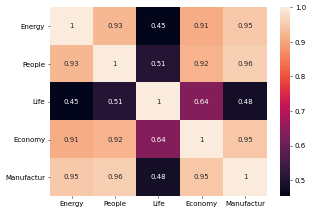

In [70]:
import seaborn as sns
#Визуализируем матрицу корреляций и ввиде тепловой карты
cols = ['Energy', 'People','Life','Economy','Manufactur']
plt.figure(figsize=(7,5), dpi= 50)
hm = sns.heatmap(df[cols].corr(), cbar=True, annot=True)
plt.yticks(rotation=360)

In [71]:
#Построение регриссионной модели
import sklearn
from sklearn.linear_model import LinearRegression
#X = df[['People','Life', 'Economy','Manufactur','Capacity']].values
X = df[['Manufactur']].values
print(X)
#X=sklearn.preprocessing.scale(X)
y = df['Energy'].values
print(y)

[[  7140]
 [  6969]
 [  7141]
 [  7349]
 [  7535]
 [  7688]
 [  7402]
 [  7263]
 [  6891]
 [ 28632]
 [ 31880]
 [ 33077]
 [ 33202]
 [ 28034]
 [ 29837]
 [ 32048]
 [ 33558]
 [ 34115]
 [ 34012]
 [ 35262]
 [ 33312]
 [ 31420]
 [  4004]
 [  4106]
 [  4206]
 [  4707]
 [  5526]
 [  5576]
 [  5240]
 [  5066]
 [  5276]
 [ 12149]
 [ 12295]
 [ 12616]
 [ 12677]
 [ 12392]
 [ 12593]
 [ 12740]
 [ 12681]
 [ 11848]
 [  8223]
 [  8003]
 [  7153]
 [  5823]
 [  5503]
 [  5433]
 [  4739]
 [  4252]
 [  4072]
 [  6716]
 [  6632]
 [  6709]
 [  6946]
 [  6961]
 [  7088]
 [  6895]
 [  6750]
 [  6676]
 [ 11401]
 [ 11541]
 [ 11481]
 [ 11638]
 [ 11696]
 [ 11112]
 [ 10476]
 [  9580]
 [  9393]
 [ 10108]
 [ 10430]
 [ 10289]
 [  9836]
 [  9656]
 [  9876]
 [ 10441]
 [ 10118]
 [ 10000]
 [130889]
 [132681]
 [135717]
 [134477]
 [141784]
 [146267]
 [144864]
 [141322]
 [135825]
 [ 57275]
 [ 56566]
 [ 56790]
 [ 57598]
 [ 56781]
 [ 57912]
 [ 50930]
 [ 48295]
 [ 44438]
 [ 18204]
 [ 17880]
 [ 17952]
 [ 18515]
 [ 18736]
 [ 18904]


In [72]:
slr = LinearRegression()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
import sklearn.model_selection
kfld=sklearn.model_selection.KFold(n_splits=5,shuffle=True, random_state=42) #разбиение
r2=sklearn.model_selection.cross_val_score(slr,X,y,cv=kfld,scoring='r2')
print(r2)
np.mean(r2)

[0.85766257 0.8803887  0.87398165 0.9311962  0.90819415]


0.8902846529354356

In [75]:
data_pr = pd.read_excel('Cap.xlsx', keep_default_na=False)
df_pr = pd.DataFrame(data_pr)
df_pr

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,Cap2019,Cap2020,Cap2021
0,Республика Адыгея,7140,6969,7141,7349,7535,7688,7402,7263,6891,7326.472222,7338.922222,7351.372222
1,Республика Калмыкия,8223,8003,7153,5823,5503,5433,4739,4252,4072,3154.972222,2603.722222,2052.472222
2,Республика Крым,,,,,13990,28632,31880,33077,33202,41016.900000,45303.800000,49590.700000
3,Краснодарский край,130889,132681,135717,134477,141784,146267,144864,141322,135825,144515.472222,145777.988889,147040.505556
4,Астраханская область,18204,17880,17952,18515,18736,18904,18063,17139,15946,17039.555556,16862.155556,16684.755556
5,Волгоградская область,56467,52909,53221,54734,55452,55720,51219,46631,43364,46002.111111,44764.377778,43526.644444
6,Ростовская область,90703,91802,87457,88144,89473,91701,90596,87817,86543,87796.222222,87483.555556,87170.888889
7,г. Севастополь,,,,,5690,9430,10549,11214,11422,13635.400000,14960.200000,16285.000000
8,Республика Дагестан,28034,29837,32048,33558,34115,34012,35262,33312,31420,34970.694444,35484.877778,35999.061111
9,Республика Ингушетия,4004,4106,4206,4707,5526,5576,5240,5066,5276,5765.083333,5946.833333,6128.583333


In [76]:
#прогноз потребления на 2020
X1= df_pr[['Cap2020']].values
print(X1)
slr.fit(X, y)
y_pred = slr.predict(X1)
print(y_pred)

[[  7338.92222222]
 [  2603.72222222]
 [ 45303.8       ]
 [145777.98888889]
 [ 16862.15555556]
 [ 44764.37777778]
 [ 87483.55555556]
 [ 14960.2       ]
 [ 35484.87777778]
 [  5946.83333333]
 [ 12455.24444444]
 [  6890.02222222]
 [  9279.12222222]
 [  9981.37777778]
 [ 45308.3       ]]
[ 1846.7642337   1005.48647834  8591.78179574 26442.49562006
  3538.70636128  8495.9455235  16085.63423614  3200.79605114
  6847.30619867  1599.43921771  2755.75394372  1767.01056239
  2191.46923053  2316.23523354  8592.58128676]


ValueError: ignored

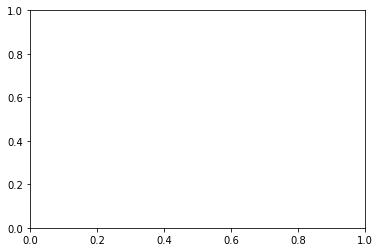

In [259]:
plt.scatter(X, y)
plt.plot(X1, slr.predict(X1), color='red', linewidth=2);

In [78]:
#прогноз потребления на 2021
X2= df_pr[['Cap2021']].values
print(X2)
slr.fit(X, y)
y2_pred = slr.predict(X2)
print(y2_pred)

[[  7351.37222222]
 [  2052.47222222]
 [ 49590.7       ]
 [147040.50555556]
 [ 16684.75555556]
 [ 43526.64444444]
 [ 87170.88888889]
 [ 16285.        ]
 [ 35999.06111111]
 [  6128.58333333]
 [ 12457.21111111]
 [  6901.82222222]
 [  9004.93888889]
 [  9964.31111111]
 [ 43848.85      ]]
[ 1848.97615887   907.54882784  9353.4124786  26666.80022967
  3507.18864845  8276.04403667 16030.08441532  3436.16620875
  6938.65841199  1631.72977187  2756.10335091  1769.10700553
  2142.75653852  2313.20308981  8333.28858105]


In [370]:
# Линейная модель
# Реалистичный прогноз
data = pd.read_excel('/main_data1.xlsx', keep_default_na=False)
df = pd.DataFrame(data)
X = df[['I1','I2','I3']].values
#X=sklearn.preprocessing.scale(X)
y = df['Energy'].values
#прогноз на 2019
data1 = pd.read_excel('prognoz.xlsx', keep_default_na=False)
df1 = pd.DataFrame(data1)
X1 = df1[['I1','I2','I3']].values
#X1=sklearn.preprocessing.scale(X1)
slr = LinearRegression()
slr.fit(X, y)
y2019={'2019':slr.predict(X1)}
#print(y2019)
#прогноз на 2020
data2 = pd.read_excel('prognoz2.xlsx', keep_default_na=False)
df2 = pd.DataFrame(data2)
X2 = df2[['I1','I2','I3']].values
#X2=sklearn.preprocessing.scale(X2)
y2020={'2020':slr.predict(X2)}
#print(y2020)
#прогноз на 2021
data3 = pd.read_excel('prognoz3.xlsx', keep_default_na=False)
df3 = pd.DataFrame(data3)
X3 = df3[['I1','I2','I3']].values
#X3=sklearn.preprocessing.scale(X3)
y2021={'2021':slr.predict(X3)}
#print(y2021)
#прогноз на 2022
data4 = pd.read_excel('prognoz4.xlsx', keep_default_na=False)
df4 = pd.DataFrame(data4)
X4 = df4[['I1','I2','I3']].values
#X4=sklearn.preprocessing.scale(X4)
y2022={'2022': slr.predict(X4)}
#print(y2022)
df2019 = pd.DataFrame(y2019)
df2020 = pd.DataFrame(y2020)
s2020=df2020.sum()
df2021 = pd.DataFrame(y2021)
s2021=df2021.sum()
df2022 = pd.DataFrame(y2022)
s2022=df2022.sum()
new_df = pd.concat([df2020, df2021,df2022],axis=1)

print(new_df)

            2020          2021          2022
0    3672.570250   4064.688625   4456.807001
1    2910.595281   2974.528429   3038.461577
2   19796.539025  18989.045424  18181.551823
3    6526.250488   5490.431114   5196.107687
4    9093.646762   8828.971428   8564.296094
5   11007.731743   8411.832610   5815.933477
6    9924.855015  10452.252428  10979.649842
7    3235.401224   3267.655655   3299.910085
8    3724.079238   3748.924032   3773.768826
9    3370.014762   3514.735715   3659.456669
10   3628.172478   3798.006829   3967.841179
11   5323.666819   5763.988624   6204.310430
12   8367.893862   9031.675890   9695.457918


In [386]:
# Линейная модель
# Позитивный прогноз

#прогноз на 2020
data2_p = pd.read_excel('prognoz2_p.xlsx', keep_default_na=False)
df2_p = pd.DataFrame(data2_p)
X2_p = df2_p[['I1','I2','I3']].values
#X2_p=sklearn.preprocessing.scale(X2_p)
y2020_p=slr.predict(X2_p)
#print(y2020_p)
#прогноз на 2021
data3_p = pd.read_excel('prognoz3_p.xlsx', keep_default_na=False)
df3_p = pd.DataFrame(data3_p)
X3_p = df3_p[['I1','I2','I3']].values
#X3_p=sklearn.preprocessing.scale(X3_p)
y2021_p=slr.predict(X3_p)
#print(y2021_p)
#прогноз на 2022
data4_p = pd.read_excel('prognoz4_p.xlsx', keep_default_na=False)
df4_p = pd.DataFrame(data4_p)
X4_p = df4_p[['I1','I2','I3']].values
#X4_p=sklearn.preprocessing.scale(X4_p)
y2022_p=slr.predict(X4_p)
#print(y2022_p)
df2020_p = pd.DataFrame(y2020_p)
df2021_p = pd.DataFrame(y2021_p)
df2022_p = pd.DataFrame(y2022_p)
s2020p=df2020_p.sum()
s2021p=df2021_p.sum()
s2022p=df2022_p.sum()
new_df_p = pd.concat([df2020_p, df2021_p,df2022_p],axis=1)
print(new_df_p)

               0             0             0
0    3892.937986   4815.754996   6402.164386
1    2987.277229   3225.541504   3672.444913
2   22187.387789  26416.035290  36289.497328
3    6299.080209   5378.319608   4864.948788
4   10016.679760  11703.013970  15583.095795
5   11954.600972  11028.729317  11639.307174
6   11050.998969  14079.941015  20046.537653
7    3355.003352   3649.547440   4248.787811
8    3912.555697   4347.028579   5253.679731
9    3520.821734   4011.098661   4917.528684
10   3818.465146   4422.510431   5547.744837
11   5784.564047   7280.694618  10048.068206
12   9286.647072  12024.578287  17230.889381


In [390]:
# Линейная модель
# Негативный прогноз
#прогноз на 2020
data2_n = pd.read_excel('prognoz2_n.xlsx', keep_default_na=False)
df2_n = pd.DataFrame(data2_n)
X2_n = df2_n[['I1','I2','I3']].values
#X2_n=sklearn.preprocessing.scale(X2_n)
y2020_n=slr.predict(X2_n)
#print(y2020_n)
#прогноз на 2021
data3_n = pd.read_excel('prognoz3_n.xlsx', keep_default_na=False)
df3_n = pd.DataFrame(data3_n)
X3_n = df3_n[['I1','I2','I3']].values
#X3_n=sklearn.preprocessing.scale(X3_n)
y2021_n=slr.predict(X3_n)
#print(y2021_n)
#прогноз на 2022
data4_n = pd.read_excel('prognoz4_n.xlsx', keep_default_na=False)
df4_n = pd.DataFrame(data4_n)
X4_n = df4_n[['I1','I2','I3']].values
#X4_n=sklearn.preprocessing.scale(X4_n)
y2022_n=slr.predict(X4_n)
#print(y2022_n)
df2020_n = pd.DataFrame(y2020_n)
df2021_n = pd.DataFrame(y2021_n)
df2022_n = pd.DataFrame(y2022_n)
s2020n=df2020_n.sum()
s2021n=df2021_n.sum()
s2022n=df2022_n.sum()
new_df_n = pd.concat([df2020_n, df2021_n,df2022_n],axis=1)
print(new_df_n)

               0             0             0
0    3562.386382   3755.265761   3795.391636
1    2872.254307   2872.026475   2826.679791
2   18601.114643  15992.805120  12288.107048
3    5951.741257   4151.353807   3357.113344
4    8632.130262   7668.860056   6277.091876
5   10534.297128   7387.445025   4755.277815
6    9361.783038   8976.251321   7973.708654
7    3175.600160   3112.590401   2986.683588
8    3629.841009   3506.414697   3286.750557
9    3294.611276   3311.796334   3238.144264
10   3533.026145   3542.842828   3439.454572
11   5093.218205   5143.904796   4917.193259
12   7908.517257   7810.850654   7183.926657


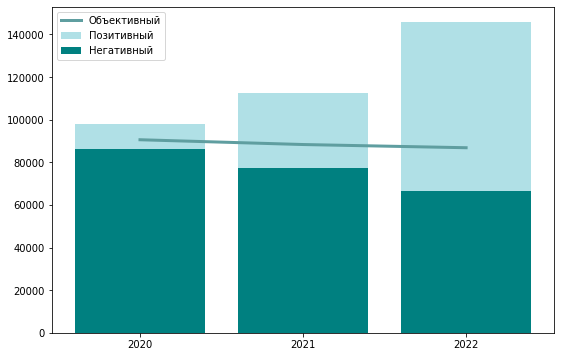

In [415]:
x = ['2020', '2021', '2022']
y1 = [int(s2020),int(s2021),int(s2022)] # реальный
y2=[int(s2020p),int(s2021p),int(s2022p)] #позитивный
y3=[int(s2020n),int(s2021n),int(s2022n)] #негативный

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'cadetblue', linewidth = 3, label = 'Объективный')
ax.bar(x, y2,color = 'powderblue',label = 'Позитивный')
ax.bar(x, y3,color = 'teal',label = 'Негативный')

fig.set_figwidth(9)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.legend()

plt.show()

In [270]:
# Нейросеть
data = pd.read_excel('/main_data1.xlsx', keep_default_na=False)
df = pd.DataFrame(data)
X = df[['I1','I2','I3']].values
#X=sklearn.preprocessing.scale(X)
y = df['Energy'].values

data1 = pd.read_excel('/prognoz.xlsx', keep_default_na=False)
df1 = pd.DataFrame(data1)
X1 = df1[['I1','I2','I3']].values
#X1=sklearn.preprocessing.scale(X1)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
#from keras.models import Dense
model = Sequential(
[
       layers.Dense(3, activation="relu", name="layer1", input_dim=3),
       layers.Dense(30, activation="relu", name="layer2"),
       layers.Dense(1, activation="sigmoid", name="layer3"),
  ])
#model.add(Dense(units=64, activation='relu', input_dim=100))
#model.add(Dense(units=10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ["accuracy"])
model.fit(X, y, validation_split=0.1, epochs=30)
model.summary()
y3=model.predict(X1)
print(y3)

Epoch 1/30
4/4 [==============================] - 0s 30ms/step - loss: 95880664.0000 - accuracy: 0.0000e+00 - val_loss: 105789144.0000 - val_accuracy: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 95880632.0000 - accuracy: 0.0000e+00 - val_loss: 105789128.0000 - val_accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 95880280.0000 - accuracy: 0.0000e+00 - val_loss: 105789112.0000 - val_accuracy: 0.0000e+00
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 95880208.0000 - accuracy: 0.0000e+00 - val_loss: 105789072.0000 - val_accuracy: 0.0000e+00
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 95880176.0000 - accuracy: 0.0000e+00 - val_loss: 105789056.0000 - val_accuracy: 0.0000e+00
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 95880136.0000 - accuracy: 0.0000e+00 - val_loss: 105789032.0000 - val_accuracy: 0.0000e+00
Epoch 7/30
4/4 [=================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')